# An Analysis of Airplane Crashes Since 1908

### An Introduction
In this module, we will be looking at a basic analysis of airplane crashes since 1908. This public data set was hosted by Open Data by Socrata and available at: 

https://opendata.socrata.com/Government/Airplane-Crashes-and-Fatalities-Since-1908/q2te-8cvq

Airline crashes has been of particular interest to the public with the notorious 737 Max incident in 2019 and can also be attributed to the release of the Smithsonian's new series <i>Mayday</i>, also known as <i>Air Crash Investigations</i>.

### Used Libraries
For this analysis, we will use the pandas libraries for data frames and the mathplot for some basic plots:

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date, timedelta, datetime

In [5]:
%matplotlib inline

### Importing Dataset
We will load a local dataset that was found at the link aforementioned:

In [6]:
crash_df = pd.read_csv('airplanecrashes.csv')
obs, feat = crash_df.shape

### A cursory overview of our data
Let's take a brief look at our data:

In [7]:
np.random.seed(42) 
crash_df.sample(4)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
4793,07/30/2001,16:00,"Haines, Alaska",Air Taxi,NaN,"Shagway, AK - Return",Piper PA-32-300,N39586,32-7840168,6.0,6.0,0.0,The sightseeing plane impacted the side of a m...
5020,11/28/2004,09:55,"Montrose, Colorado",Glow Air/Air Castle - Charter,73,"Montrose, CO - South Bend, IN",Canadair CL-601-2A12 Challenger,N873G,3009,6.0,3.0,0.0,"While attempting to take off from R31, the air..."
655,06/20/1944,NaN,"Porto Alegre, Brazil",Varig,NaN,NaN,Lockheed 10C Electra,PP-VAG,1008,10.0,10.0,0.0,Crashed into a river.
1874,10/09/1963,NaN,"Near Marseilles, France",Aeronaves de Panama,NaN,"Marseilles, France - Dhah, Saudi Arabia",Douglas C-74,HP-385,13915,6.0,6.0,0.0,Crashed shortly after taking off with a cargo ...


Now let's look at some of the basic statistics:

In [8]:
print('Dataset consists of {} observations (crashes) and {} features of the flights, which are:'.format(str(obs), str(feat)))

Dataset consists of 5268 observations (crashes) and 13 features of the flights, which are:


In [9]:
list(crash_df.columns)

['Date',
 'Time',
 'Location',
 'Operator',
 'Flight #',
 'Route',
 'Type',
 'Registration',
 'cn/In',
 'Aboard',
 'Fatalities',
 'Ground',
 'Summary']

Let's examine the data for missing values in the rows:

In [10]:
crash_df.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

While we don't have many problems with the data, let's go ahead and fix some of the more notable problems with the data:

In [11]:
crash_df['Time'] = crash_df['Time'].replace(np.nan, '00:00')
crash_df['Time'] = crash_df['Time'].str.replace('c: ', '')
crash_df['Time'] = crash_df['Time'].str.replace('c:', '')
crash_df['Time'] = crash_df['Time'].str.replace('c', '')
crash_df['Time'] = crash_df['Time'].str.replace('12\'20', '12:20')
crash_df['Time'] = crash_df['Time'].str.replace('18.40', '18:40')
crash_df['Time'] = crash_df['Time'].str.replace('0943', '09:43')
crash_df['Time'] = crash_df['Time'].str.replace('22\'08', '22:08')
crash_df['Time'] = crash_df['Time'].str.replace('114:20', '00:00')

Let's join the time to the date:

In [12]:
crash_df['Time'] = crash_df['Date'] + ' ' + crash_df['Time']
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
crash_df['Time'] = crash_df['Time'].apply(todate)

### The Number of Aviation Accidents over Time
Let's start with a basic line plot that shows us the number of accidents per year:

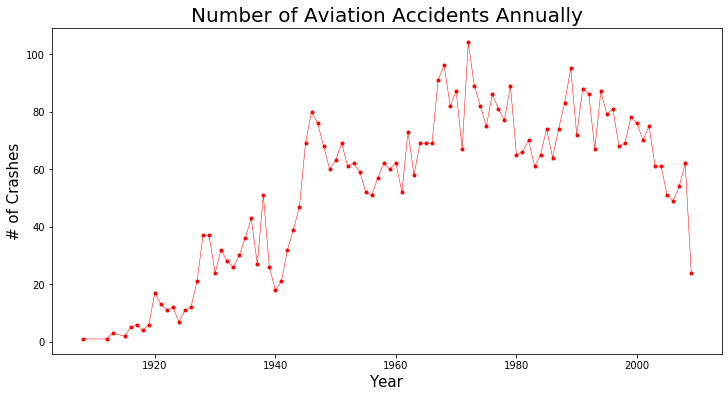

In [13]:
crash_df_timegroup = crash_df.groupby(crash_df.Time.dt.year).count()

plt.figure(figsize=(12,6))

plt.plot('Date', data=crash_df_timegroup, color = 'red', marker = '.', linewidth = 0.5)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('# of Crashes', fontsize = 15)
plt.title('Number of Aviation Accidents Annually', fontsize = 20)
plt.show()

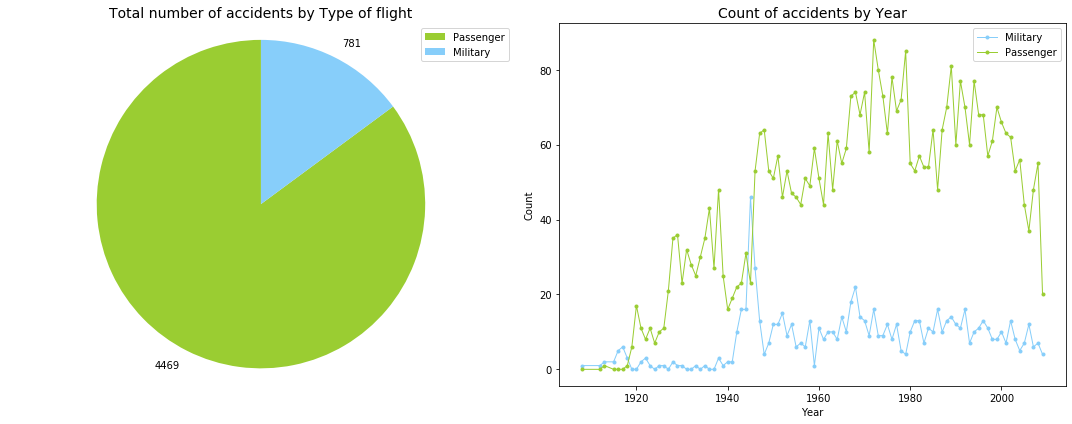

In [17]:
Temp = crash_df.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Temp2 = crash_df.copy()
Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']]
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)

colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)
plt.legend(patches, Temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Total number of accidents by Type of flight', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Temp2.index, 'Military', data=Temp2, color='lightskyblue', marker = ".", linewidth=1)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellowgreen', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

### Some Insights and Possible Further Analysis
We can extract some interesting insights from a cusory glance at this graph:

1) The number of accidents steadily increased (probably due to the rise in air traffic) until it's peak in the 1970's, followed by a small spike in the 90's with a strong decline after the year 2000 (probably due to the advancement of aviation technology and air safety).

2) There was a sudden spike in accidents after the year 1940. It would be interesting to investigate what may have led to the spike in accidents.

3) One might be quick to state that the period betwen 1970 to 1990 was a relatively dangerous time in aviation (while still probably being the safest mode of transit?). However, this might not be true depending on the proportion of flights to accidents.

4) As in our subplots, we can see that the majority of our accidents are military.

To improve our visualization, it might be prudent to normalize our data by dividing the counts by the number of flights in the given year. What is unfortunate is that there does not seem to be a reliable database of the number of flights flown.

## Analysis on Airlines (Seaborn Package)
Let's shift gears and instead look at the different airlines that have flown and their relevant aviation accidents:

In [14]:
import seaborn as sns

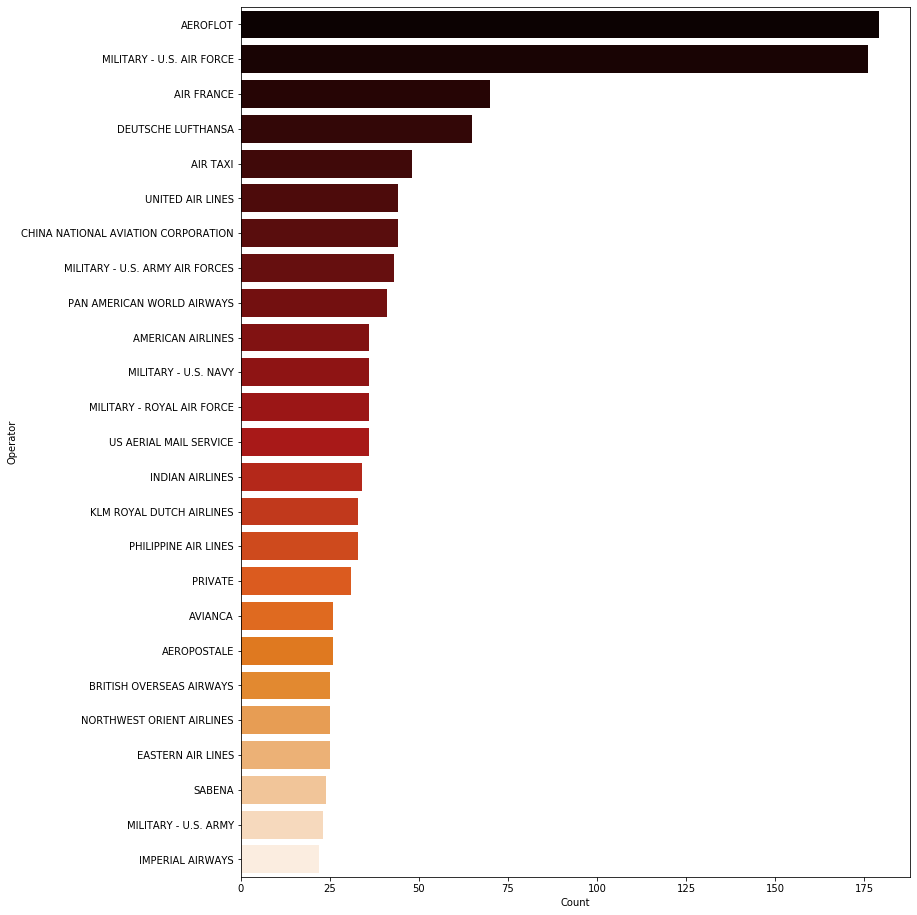

In [15]:
crash_df.Operator = crash_df.Operator.str.upper()
crash_df.Operator = crash_df.Operator.replace('A B AEROTRANSPORT', 'AB AEROTRANSPORT')

Total = crash_df.groupby('Operator')[['Operator']].count()
Total = Total.rename(columns={'Operator':'Count'})
Total = Total.sort_values(by='Count', ascending=False).head(25)

plt.figure(figsize=(12,16))

sns.barplot(data = Total, x = 'Count', y=Total.index, palette="gist_heat")
plt.show()